In [1]:
def convert_partial_year(number):
    from datetime import timedelta, datetime

    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

In [2]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=ValueWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [38]:
import datetime as dt
import pandas as pd
import numpy as np
import copy
import pickle
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import meanabs,rmse

In [6]:
path = 'data/SLV_working.pkl'
with open(path, 'rb') as f:
    slv_clean=pickle.load(f)

In [7]:
slv_data=slv_clean['Close']

### **To model, we split the data into training and test sets. We use the first 80% of the data as the training set.**

In [8]:
data = slv_data
train_ratio = 0.80
split = round(train_ratio * len(data))
train, test = data.iloc[0:split], data.iloc[split:]

In [58]:
metrics = []
for d in range(1,3):
    for p in range(7):
        for q in range(7):
            try:
                model = ARIMA(train,order=(p,d,q),trend='n')
                result = model.fit()
                metrics.append((p,d,q,result.aic,result.bic))
            except:
                pass
metr_diff = pd.DataFrame(metrics,columns=['p','d','q','AIC','BIC'])
metr_diff.sort_values('AIC').head()

,p,d,q,AIC,BIC
39,5,1,4,530.581666,579.719040
23,3,1,2,531.754321,561.236745
17,2,1,3,532.464364,561.946789
34,4,1,6,532.542914,586.594025
40,5,1,5,532.821356,586.872467


In [59]:
metr_diff.sort_values('BIC').head()

,p,d,q,AIC,BIC
0,0,1,0,555.055120,559.968857
23,3,1,2,531.754321,561.236745
17,2,1,3,532.464364,561.946789
7,1,1,0,556.850132,566.677607
1,0,1,1,556.869741,566.697215


In [60]:
model = ARIMA(train,order=(5,1,4),trend='n')
arma514 = model.fit()
print(arma514.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -255.291
Date:                Sun, 09 Jan 2022   AIC                            530.582
Time:                        20:24:23   BIC                            579.719
Sample:                             0   HQIC                           549.252
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2181      0.037     -5.975      0.000      -0.290      -0.147
ar.L2          0.6851      0.026     26.089      0.000       0.634       0.737
ar.L3         -0.1818      0.033     -5.525      0.0

In [166]:
model = ARIMA(train,order=(3,1,2),trend='n')
arma312 = model.fit()
print(arma312.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -259.877
Date:                Mon, 10 Jan 2022   AIC                            531.754
Time:                        18:47:43   BIC                            561.237
Sample:                             0   HQIC                           542.956
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4842      0.021     69.720      0.000       1.442       1.526
ar.L2         -0.8903      0.030    -30.110      0.000      -0.948      -0.832
ar.L3         -0.0657      0.018     -3.671      0.0

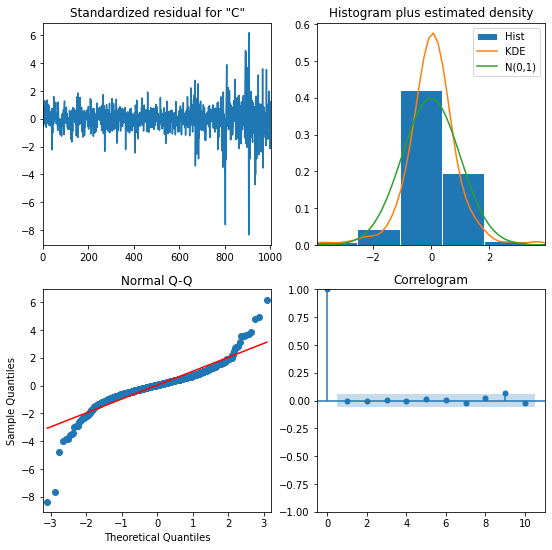

In [66]:
arma312.plot_diagnostics(figsize=(9,9))
plt.show()

In [11]:
lgt = np.log(train)
lgt.rename('log(train)',inplace=True)

Date
2017-01-03    2.736962
2017-01-04    2.745988
2017-01-05    2.757475
2017-01-06    2.749832
2017-01-09    2.753661
                ...   
2020-12-24    3.176386
2020-12-28    3.195812
2020-12-29    3.194173
2020-12-30    3.209229
2020-12-31    3.201526
Name: log(train), Length: 1007, dtype: float64

In [62]:
metrics = []
for d in range(1,3):
    for p in range(6):
        for q in range(6):
            try:
                model = ARIMA(lgt,order=(p,d,q),trend='n')
                result = model.fit()
                metrics.append((p,d,q,result.aic,result.bic))
            except:
                pass
metr_diff = pd.DataFrame(metrics,columns=['p','d','q','AIC','BIC'])
metr_diff.sort_values('AIC').head()

,p,d,q,AIC,BIC
15,2,1,3,-5390.343511,-5360.861087
20,3,1,2,-5390.251158,-5360.768734
16,2,1,4,-5388.267291,-5353.871130
21,3,1,3,-5387.999458,-5353.603296
17,2,1,5,-5386.383013,-5347.073114


In [165]:
model = ARIMA(lgt,order=(3,1,2),trend='n')
arma312 = model.fit()
print(arma312.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(3, 1, 2)   Log Likelihood                2701.126
Date:                Mon, 10 Jan 2022   AIC                          -5390.251
Time:                        18:22:15   BIC                          -5360.769
Sample:                             0   HQIC                         -5379.049
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1968      0.090     13.305      0.000       1.021       1.373
ar.L2         -0.6033      0.103     -5.836      0.000      -0.806      -0.401
ar.L3         -0.0769      0.021     -3.614      0.0

In [69]:
metrics = []
d = 1
D = 0
for s in range(6):
    for p in range(4):
        for q in range(4):
            for P in range(4):
                for Q in range(4):
                    try:
                        model = ARIMA(lgt,order=(p,d,q),seasonal_order=(P,D,Q,s),trend='n')
                        result = model.fit()
                        metrics.append((p,d,q,P,D,Q,s,result.aic,result.bic))
                    except:
                        pass
metr_resid = pd.DataFrame(metrics,columns=['p','d','q','P','D','Q','s','AIC','BIC'])
metr_resid.sort_values('AIC').head()

,p,d,q,P,D,Q,s,AIC,BIC
126,0,1,0,2,0,2,3,-5397.588665,-5373.019978
717,2,1,3,0,0,0,5,-5390.343511,-5360.861087
461,2,1,3,0,0,0,4,-5390.343511,-5360.861087
11,2,1,3,0,0,0,0,-5390.343511,-5360.861087
268,2,1,3,0,0,0,3,-5390.343511,-5360.861087


In [193]:
model = ARIMA(lgt,order=(0,1,0),seasonal_order=(2,0,2,3),trend='n')
arma010seas = model.fit()
print(arma010seas.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           log(train)   No. Observations:                 1007
Model:             ARIMA(0, 1, 0)x(2, 0, [1, 2], 3)   Log Likelihood                2703.794
Date:                              Tue, 11 Jan 2022   AIC                          -5397.589
Time:                                      20:09:16   BIC                          -5373.020
Sample:                                           0   HQIC                         -5388.254
                                             - 1007                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L3       -1.0081      0.015    -69.397      0.000      -1.037      -0.980
ar.S.L6       -0.97

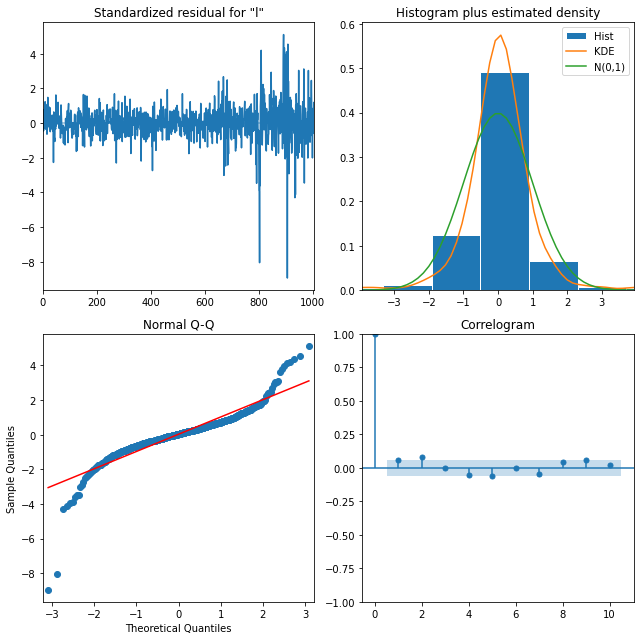

In [195]:
fig5 = plt.figure(figsize=(9,9))
arma010seas.plot_diagnostics(fig=fig5)
fig5.tight_layout()
fig5.savefig('plots/fig5.png')

In [56]:
model = ARIMA(train,order=(0,1,0),seasonal_order=(2,0,2,3),trend='n')
arma010seas = model.fit()
pred_arma010seas = arma010seas.get_prediction(start=1,dynamic=False)
pred_arma010seas_mean = pred_arma010seas.predicted_mean
pred_arma010seas_ci = pred_arma010seas.conf_int()
pred_arma010seas_ll = pred_arma010seas_ci.loc[:,'lower Close']
pred_arma010seas_ul = pred_arma010seas_ci.loc[:,'upper Close']
mae_train010seas = meanabs(train[1:],pred_arma010seas_mean)
rmse_train010seas = rmse(train[1:],pred_arma010seas_mean)
print('Training Set')
print(model.order, model.seasonal_order)
print(f'MAE = {mae_train010seas}')
print(f'RMSE = {rmse_train010seas}')
print()

model = ARIMA(train,order=(3,1,2),trend='n')
arma312 = model.fit()
pred_arma312 = arma312.get_prediction(start=1,dynamic=False)
pred_arma312_mean = pred_arma312.predicted_mean
pred_arma312_ci = pred_arma312.conf_int()
pred_arma312_ll = pred_arma312_ci.loc[:,'lower Close']
pred_arma312_ul = pred_arma312_ci.loc[:,'upper Close']
mae_train312 = meanabs(train[1:],pred_arma312_mean)
rmse_train312 = rmse(train[1:],pred_arma312_mean)

print(model.order, model.seasonal_order)
print(f'MAE = {mae_train312}')
print(f'RMSE = {rmse_train312}')

Training Set
(0, 1, 0) (2, 0, 2, 3)
MAE = 0.18539817903854755
RMSE = 0.3109892627637581

(3, 1, 2) (0, 0, 0, 0)
MAE = 0.18482806024955795
RMSE = 0.31315683317554543


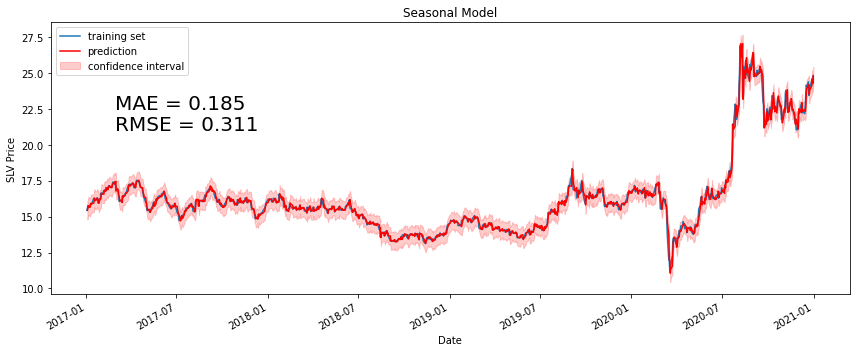

In [68]:
fig6, ax = plt.subplots(1,1,figsize=(12,5))
train.plot(label='training set')
pred_arma010seas_mean.plot(color='red',label='prediction')
ax.set_xlabel('Date')
ax.set_ylabel('SLV Price')
ax.set_title('Seasonal Model')
ax.fill_between(pred_arma010seas_ll.index, pred_arma010seas_ll, pred_arma010seas_ul, color='red',alpha=0.2,label='confidence interval')
ax.text(dt.date(2017,3,1),22.5,f'MAE = {mae_train010seas:.3f}',fontsize=20)
ax.text(dt.date(2017,3,1),21,f'RMSE = {rmse_train010seas:.3f}',fontsize=20)
plt.legend(loc='best')
fig6.tight_layout()
fig6.savefig('plots/fig6.png')

In [ ]:
fig7, ax = plt.subplots(1,1,figsize=(12,5))
test.plot(label='test set')
test_arma312_mean.plot(color='red',label='test prediction')
ax.fill_between(test_arma312_ll.index, test_arma312_ll, test_arma312_ul, color='red',alpha=0.2,
                label='95% confidence interval')
ax.text(datetime.date(2021,2,1),40,f'MAE = {mae_test312:.3f}',fontsize=20)
ax.text(datetime.date(2021,2,1),37.5,f'RMSE = {rmse_test312:.3f}',fontsize=20)
ax.set_title('Seasonal Model')
plt.legend(loc='best')
fig.tight_layout()

In [164]:
model = ARIMA(lgt,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
arma010seas = model.fit()
pred_arma010seas = arma010seas.get_prediction(start=1,dynamic=False)
pred_arma010seas_mean = np.exp(pred_arma010seas.predicted_mean)
pred_arma010seas_ci = np.exp(pred_arma010seas.conf_int())
pred_arma010seas_ll = pred_arma010seas_ci.loc[:,'lower Close']
pred_arma010seas_ul = pred_arma010seas_ci.loc[:,'upper Close']
mae_train010seas = meanabs(train[1:],pred_arma010seas_mean)
rmse_train010seas = rmse(train[1:],pred_arma010seas_mean)
print('Training Set')
print(model.order, model.seasonal_order)
print(f'MAE = {mae_train010seas}')
print(f'RMSE = {rmse_train010seas}')
print()

model = ARIMA(lgt,order=(3,1,2),trend='t')
arma312 = model.fit()
pred_arma312 = arma312.get_prediction(start=1,dynamic=False)
pred_arma312_mean = np.exp(pred_arma312.predicted_mean)
pred_arma312_ci = np.exp(pred_arma312.conf_int())
pred_arma312_ll = pred_arma312_ci.loc[:,'lower Close']
pred_arma312_ul = pred_arma312_ci.loc[:,'upper Close']
mae_train312 = meanabs(train[1:],pred_arma312_mean)
rmse_train312 = rmse(train[1:],pred_arma312_mean)

print(model.order, model.seasonal_order)
print(f'MAE = {mae_train312}')
print(f'RMSE = {rmse_train312}')

(0, 1, 0) (2, 0, 2, 3)
MAE = 0.18346764648239064
RMSE = 0.3162039011344841

Training Set
(3, 1, 2) (0, 0, 0, 0)
MAE = 0.1843072360774723
RMSE = 0.31553656534473357


In [208]:
print(base_test.values[0:10])

[25.35     25.35     25.67     25.34     25.26     23.51     23.209999
 23.719999 23.440001 23.709999]


In [209]:
print(baseline[0:10])

[24.57     25.35     25.67     25.34     25.26     23.51     23.209999
 23.719999 23.440001 23.709999]


In [210]:
base_pred = pd.Series(index=train.index,dtype='float')
base_pred[0] = train[0]
base_pred.values[1:] = train.values[:-1]
mae_base = meanabs(train,base_pred)
rmse_base = rmse(train,base_pred)
print(f'Base MAE = {mae_base:.4f}, Base RMSE = {rmse_base:.4f}')
base_test = pd.Series(index=test.index,dtype='float')
base_test[0] = train[-1]
base_test.values[1:] = test.values[:-1]
mae_base_test = meanabs(test,base_test)
rmse_base_test = rmse(test,base_test)
print(f'Base Test MAE = {mae_base_test:.4f}, Base Test RMSE = {rmse_base_test:.4f}')

Base MAE = 0.1830, Base RMSE = 0.3184
Base Test MAE = 0.2926, Base Test RMSE = 0.4084


In [308]:
training = copy.deepcopy(lgt)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    predicted = fitted.get_forecast(steps=1).predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = predicted
pred = np.exp(pred)
pred.index = test.index

In [ ]:
model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
training = copy.deepcopy(lgt)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
lgtest = np.log(test)
tst = copy.deepcopy(lgtest)
tst.index = new_index
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    predicted = fitted.get_forecast(steps=1).predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = tst.iloc[day-1]
pred = np.exp(pred)
pred.index = test.index

In [104]:
training = copy.deepcopy(lgt)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
lgtest = np.log(test)
tst = copy.deepcopy(lgtest)
tst.index = new_index
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
#    model = ARIMA(training,order=(3,1,2),trend='t')
    fitted = model.fit()
    predicted = fitted.get_forecast(steps=1).predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = tst.iloc[day-1]
pred = np.exp(pred)
pred.index = test.index

print(model.order, model.seasonal_order)
mae_test = meanabs(test,pred)
rmse_test = rmse(test,pred)

print(f'MAE = {mae_test:.4f}')
print(f'RMSE = {rmse_test:.4f}')

(0, 1, 0) (2, 0, 2, 3)
MAE = 0.2914
RMSE = 0.4057


In [102]:
training = copy.deepcopy(train)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
tst = copy.deepcopy(test)
tst.index = new_index
for day in range(1,trading_days_inyear+1):
#    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    model = ARIMA(training,order=(3,1,2),trend='t')
    fitted = model.fit()
    predicted = fitted.get_forecast(steps=1).predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = tst.iloc[day-1]
pred.index = test.index

print(model.order, model.seasonal_order)
mae_test = meanabs(test,pred)
rmse_test = rmse(test,pred)

print(f'MAE = {mae_test:.4f}')
print(f'RMSE = {rmse_test:.4f}')

(3, 1, 2) (0, 0, 0, 0)
MAE = 0.2997
RMSE = 0.4126


In [65]:
training = copy.deepcopy(train)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
tst = copy.deepcopy(test)
tst.index = new_index
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='n')
#    model = ARIMA(training,order=(3,1,2),trend='n')
    fitted = model.fit()
    predicted = fitted.get_forecast(steps=1).predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = tst.iloc[day-1]
pred.index = test.index

print(model.order, model.seasonal_order)
mae_test = meanabs(test,pred)
rmse_test = rmse(test,pred)

print(f'MAE = {mae_test:.4f}')
print(f'RMSE = {rmse_test:.4f}')

(0, 1, 0) (2, 0, 2, 3)
MAE = 0.2884
RMSE = 0.4036


In [105]:
training = copy.deepcopy(train)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
llimit = pd.Series(index=new_index,dtype='float')
ulimit = pd.Series(index=new_index,dtype='float')
tst = copy.deepcopy(test)
tst.index = new_index
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    fcast = fitted.get_forecast(steps=1)
    llimit[day] = fcast.conf_int()['lower Close'].values[0]
    ulimit[day] = fcast.conf_int()['upper Close'].values[0]
    predicted = fcast.predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = tst.iloc[day-1]
pred010seas = pred
pred010seas.index = test.index
llimit.index = test.index
ulimit.index = test.index

mae_test010seas = meanabs(test,pred010seas)
rmse_test010seas = rmse(test,pred010seas)

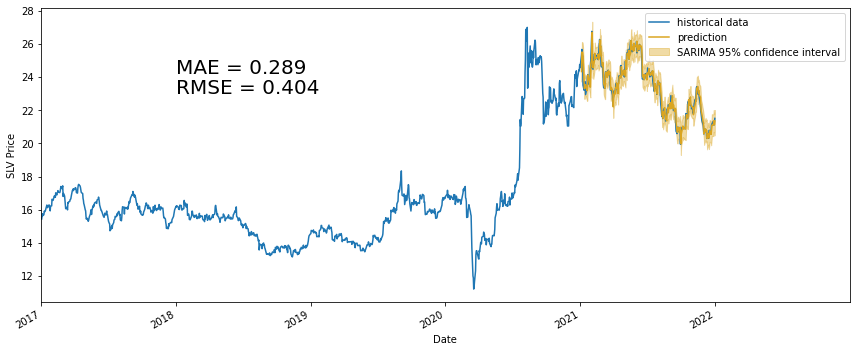

In [106]:
fig7, ax = plt.subplots(1,1,figsize=(12,5))
slv_clean['Close'].plot(label='historical data')
xmin, xmax = dt.date(2017,1,1), dt.date(2022,12,31)
ax.set_xlim([xmin,xmax])
ax.set_xlabel('Date')
ax.set_ylabel('SLV Price')
pred.plot(color='goldenrod',label='prediction')
ax.text(dt.date(2018,1,1),24.2,f'MAE = {mae_test010seas:.3f}',fontsize=20)
ax.text(dt.date(2018,1,1),23,f'RMSE = {rmse_test010seas:.3f}',fontsize=20)
ax.fill_between(llimit.index, llimit, ulimit, color='goldenrod',
                alpha=0.4,label='SARIMA 95% confidence interval')
plt.legend(loc='best')
fig7.tight_layout()
fig7.savefig('plots/fig7.png')

In [126]:
training = copy.deepcopy(train)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')
llimit = pd.Series(index=new_index,dtype='float')
ulimit = pd.Series(index=new_index,dtype='float')
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    fcast = fitted.get_forecast(steps=1)
    predicted = fcast.predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = predicted
forecst = pred
forecst.index = test.index
model_orig = ARIMA(train,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
fitted_orig = model_orig.fit()
conf_int = fitted_orig.get_forecast(steps=trading_days_inyear).conf_int()
llimit = conf_int.loc[:,'lower Close']
ulimit = conf_int.loc[:,'upper Close']
llimit.index = forecst.index
ulimit.index = forecst.index

In [129]:
forecst.iloc[-1]/forecst.iloc[0]

1.096015831536465

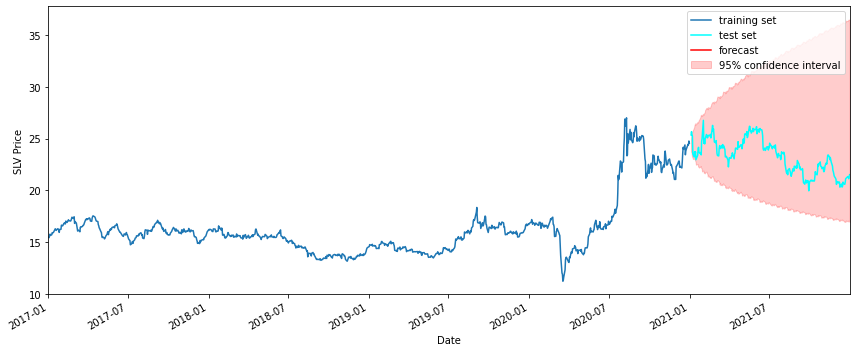

In [146]:
fig8, ax = plt.subplots(1,1,figsize=(12,5))
train.plot(label='training set')
xmin, xmax = dt.date(2017,1,1), dt.date(2021,12,31)
ax.set_xlim([xmin,xmax])
#ax.set_ylim([20,30])
ax.set_xlabel('Date')
ax.set_ylabel('SLV Price')
test.plot(color='cyan',label='test set')
forecst.plot(color='red',label='forecast')
ax.fill_between(llimit.index, llimit, ulimit, color='red',
                alpha=0.2,label='95% confidence interval')
plt.legend(loc='best')
fig8.tight_layout()
#fig8.savefig('plots/fig8.png')

In [144]:
slv_data.loc['2021-07-01':'2020-07-31']

Date
2020-07-01    16.820000
2020-07-02    16.709999
2020-07-06    17.049999
2020-07-07    17.010000
2020-07-08    17.490000
2020-07-09    17.379999
2020-07-10    17.430000
2020-07-13    17.730000
2020-07-14    17.969999
2020-07-15    18.170000
2020-07-16    17.780001
2020-07-17    18.010000
2020-07-20    18.530001
2020-07-21    19.670000
2020-07-22    21.440001
2020-07-23    21.030001
2020-07-24    21.209999
2020-07-27    22.830000
2020-07-28    22.770000
2020-07-29    22.570000
2020-07-30    21.760000
2020-07-31    22.650000
Name: Close, dtype: float64

In [211]:
ind = np.empty(5,dtype='int')
ind[0:5] = np.arange(5)*252
ind[5] = 1259
base = np.empty(len(slv_data),dtype='float')
base[0] = slv_data[0]
base[1:] = slv_data[:-1]
mae_pred, mae_base, rmse_pred, rmse_base = list(), list(), list(), list()

for fold in range(5):
#for fold in range(1):
    print(f'fold = {fold}')
    train = slv_data.iloc[ind[fold]:ind[fold+1]]
#    train = slv_data.iloc[0:1007]
    valid = slv_data.iloc[ind[fold+1]:ind[fold+2]]
#    valid = slv_data.iloc[1007:]
    pred = pd.Series(index=np.arange(len(valid)),dtype='float')
    baseline = pd.Series(index=np.arange(len(valid)),dtype='float')
    training = copy.deepcopy(train)
    training.reset_index(inplace=True,drop=True)
    for day in range(len(valid)):
        model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
        fitted = model.fit()
        fcast = fitted.get_forecast(steps=1)
        pred[day] = fcast.predicted_mean.values[0]
        training[len(training)] = valid.iloc[day]
    baseline = base[ind[fold+1]:ind[fold+2]]
#    baseline = base[1007:]
    mae_p = meanabs(valid,pred.values)
    mae_pred.append(mae_p)
    mae_b = meanabs(valid,baseline)
    mae_base.append(mae_p)
    print(f'Model MAE = {mae_p:.4f}')
    print(f'Baseline MAE = {mae_b:.4f}')
    print()
    rmse_p = rmse(valid,pred.values)
    rmse_pred.append(rmse_p)
    rmse_b = rmse(valid,baseline)
    rmse_base.append(rmse_b)
    print(f'Model RMSE = {rmse_p:.4f}')
    print(f'Baseline RMSE = {rmse_b:.4f}')

fold = 0
Model MAE = 0.1159
Baseline MAE = 0.1126

Model RMSE = 0.1560
Baseline RMSE = 0.1512
fold = 1
Model MAE = 0.1311
Baseline MAE = 0.1303

Model RMSE = 0.1951
Baseline RMSE = 0.1933
fold = 2
Model MAE = 0.3794
Baseline MAE = 0.3619

Model RMSE = 0.5866
Baseline RMSE = 0.5654
fold = 3
Model MAE = 0.2918
Baseline MAE = 0.2907

Model RMSE = 0.4129
Baseline RMSE = 0.4062
fold = 4
Model MAE = nan
Baseline MAE = nan

Model RMSE = nan
Baseline RMSE = nan


/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [212]:
ind

array([   0,  252,  504,  756, 1008, 1259,  756,  882, 1008, 1134, 1259])

In [205]:
print(valid.iloc[:20])

Date
2021-01-04    25.350000
2021-01-05    25.670000
2021-01-06    25.340000
2021-01-07    25.260000
2021-01-08    23.510000
2021-01-11    23.209999
2021-01-12    23.719999
2021-01-13    23.440001
2021-01-14    23.709999
2021-01-15    22.950001
2021-01-19    23.379999
2021-01-20    24.010000
2021-01-21    24.150000
2021-01-22    23.660000
2021-01-25    23.549999
2021-01-26    23.650000
2021-01-27    23.420000
2021-01-28    24.719999
2021-01-29    24.990000
2021-02-01    26.760000
Name: Close, dtype: float64


In [206]:
print(baseline[0:20])

[24.57     25.35     25.67     25.34     25.26     23.51     23.209999
 23.719999 23.440001 23.709999 22.950001 23.379999 24.01     24.15
 23.66     23.549999 23.65     23.42     24.719999 24.99    ]


In [ ]:
training = copy.deepcopy(train)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')

# mean
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    fcast = fitted.get_forecast(steps=1)
    predicted = fcast.predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = predicted

forecst = pred
day_int = 1/trading_days_inyear
fore_index = pd.Index(np.arange(2022+day_int,2023,day_int))
fore_index_conv = fore_index.map(convert_partial_year)
forecst.index = fore_index_conv

In [132]:
training = copy.deepcopy(slv_data)
training.reset_index(inplace=True,drop=True)
trading_days_inyear = 252
new_index = np.arange(1,trading_days_inyear+1)
pred = pd.Series(index=new_index,dtype='float')

# mean
for day in range(1,trading_days_inyear+1):
    model = ARIMA(training,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
    fitted = model.fit()
    fcast = fitted.get_forecast(steps=1)
    predicted = fcast.predicted_mean.values[0]
    pred[day] = predicted
    training[len(training)] = predicted

forecst = pred
day_int = 1/trading_days_inyear
fore_index = pd.Index(np.arange(2022+day_int,2023,day_int))
fore_index_conv = fore_index.map(convert_partial_year)
forecst.index = fore_index_conv

In [133]:
model = ARIMA(slv_data,order=(0,1,0),seasonal_order=(2,0,2,3),trend='t')
arma010seas_all = model.fit()
fore_arma010seas_all = arma010seas_all.get_forecast(steps=trading_days_inyear)
day_int = 1/trading_days_inyear
#fore_arma010seas_all_mean = fore_arma010seas_all.predicted_mean
fore_index = pd.Index(np.arange(2022+day_int,2023,day_int))
fore_index_conv = fore_index.map(convert_partial_year)
fore_arma010seas_all_ci = fore_arma010seas_all.conf_int()
fore_arma010seas_all_ci.index = fore_index_conv
fore_arma010seas_all_ll = fore_arma010seas_all_ci.loc[:,'lower Close']
fore_arma010seas_all_ul = fore_arma010seas_all_ci.loc[:,'upper Close']

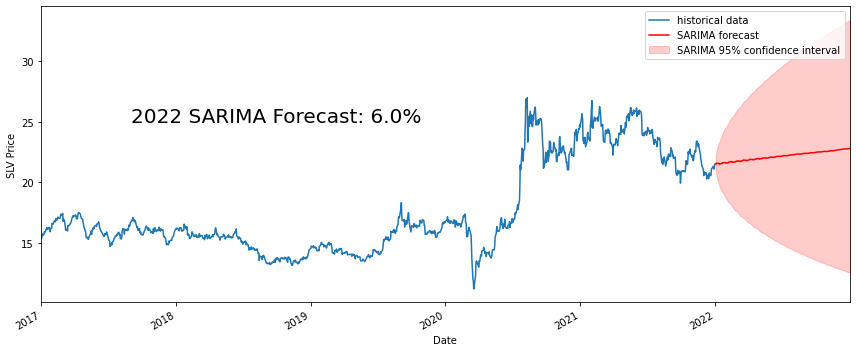

In [134]:
fig9, ax = plt.subplots(1,1,figsize=(12,5))
slv_clean['Close'].plot(label='historical data')
xmin, xmax = dt.date(2017,1,1), dt.date(2022,12,31)
ax.set_xlim([xmin,xmax])
forecst.plot(color='red',label='SARIMA forecast')
ax.set_xlabel('Date')
ax.set_ylabel('SLV Price')
sar_forecast = 100*((forecst.iloc[-1]/forecst.iloc[0])-1)
ax.text(dt.date(2017,9,1),25,f'2022 SARIMA Forecast: {sar_forecast:.1f}%',fontsize=20)
ax.fill_between(forecst.index, fore_arma010seas_all_ll, fore_arma010seas_all_ul, color='red',
                alpha=0.2,label='SARIMA 95% confidence interval')
plt.legend(loc='best')
fig9.tight_layout()
fig9.savefig('plots/fig9.png')

In [149]:
print(fore_arma010seas_all_ul[-1])

33.42276015374983


In [160]:
print(f'Lower limit = {100*((fore_arma010seas_all_ll[-1]/fore_arma010seas_all_mean[0])-1):.1f}%')
print(f'Upper limit = {100*((fore_arma010seas_all_ul[-1]/fore_arma010seas_all_mean[0])-1):.1f}%')

Lower limit = -41.6%
Upper limit = 55.3%


In [163]:
model = ARIMA(slv_clean['Close'],order=(3,1,2),trend='t')
arma312_all = model.fit()
fore_arma312_all = arma312_all.get_forecast(steps=252)
day_int = 1/252
fore_arma312_all_mean = fore_arma312_all.predicted_mean
fore_index = pd.Index(np.arange(2022+day_int,2023,day_int))
fore_index_conv = fore_index.map(convert_partial_year)
fore_arma312_all_mean.index = fore_index_conv
print(f'ARIMA (3,1,2) forecast: {100*((fore_arma312_all_mean[-1]/fore_arma312_all_mean[0])-1):.1f}%')

ARIMA (3,1,2) forecast: 1.6%
